<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/WORM-tour/title.png" title="WORM title" width=800/>

<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/WORM-tour/whyWORM.png" title="Why WORM?" width=800/>

<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/WORM-tour/aboutWORM.png" title="About WORM" width=800/>

<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/WORM-tour/outline.png" title="Outline" width=800/>

---

## Brief WORM Portal tour here...

---

## Aqueous speciation with AqEquil

<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/WORM-tour/speciation.png" title="speciation" width=800/>

Split species into *basis* and *non-basis* to make setting up the problem easier.

$\color{blue}{\text{Basis} : \text{H}_{2}\text{O}, \text{H}^{+}, \text{SiO}_{2(aq)}, \text{Mg}^{2+}, \text{Ca}^{2+}, \text{Na}^{+}}$

$\color{darkorange}{\text{Non-Basis} : \text{HSiO}_{3}^{-}, \text{Mg(HSiO}_{3}\text{)}^{+}, \text{Ca(HSiO}_{3}\text{)}^{+}, \text{NaHSiO}_{3(aq)}, \text{Mg(HCO}_{3}\text{)}^{+}, \text{Ca(HCO}_{3}\text{)}^{+}, \text{NaHCO}_{3}, \text{CO}_{3}^{2-}, \text{MgCO}_{3(aq)}, \text{CaCO}_{3(aq)}, \text{NaCO}_{3}^{-}}$


\begin{align}
\color{blue}{\text{SiO}_{2(aq)}} + \color{blue}{\text{H}_{2}\text{O}} &\rightleftharpoons \color{darkorange}{\text{HSiO}_{3}^{-}} + \color{blue}{\text{H}^{+}} \\
\color{blue}{\text{SiO}_{2(aq)}} + \color{blue}{\text{Mg}^{2+}} + \color{blue}{\text{H}_{2}\text{O}} &\rightleftharpoons \color{darkorange}{\text{Mg(HSiO}_{3}\text{)}^{+}} + \color{blue}{\text{H}^{+}} \\
\color{blue}{\text{SiO}_{2(aq)}} + \color{blue}{\text{Ca}^{2+}} + \color{blue}{\text{H}_{2}\text{O}} &\rightleftharpoons \color{darkorange}{\text{Ca(HSiO}_{3}\text{)}^{+}} + \color{blue}{\text{H}^{+}} \\
\color{blue}{\text{SiO}_{2(aq)}} + \color{blue}{\text{Na}^{+}} + \color{blue}{\text{H}_{2}\text{O}} &\rightleftharpoons \color{darkorange}{\text{NaHSiO}_{3(aq)}} \\
\end{align}

\begin{align}
\color{blue}{\text{HCO}_{3}^{-}} &\rightleftharpoons \color{darkorange}{\text{CO}_{3}^{2-}} + \color{blue}{\text{H}^{+}} \\
\color{blue}{\text{HCO}_{3}^{-}} + \color{blue}{\text{Mg}^{2+}} + &\rightleftharpoons \color{darkorange}{\text{Mg(HCO}_{3}\text{)}^{+}} + \color{blue}{\text{H}^{+}} \\
\text{...} & \text{and so on...}
\end{align}

To find the concentrations of all basis and non-basis, you'd need to find the root of an enormous set of equilibrium equations. Not easy to do by hand!

Fortunately, computational tools exist to help.

---

### Example: submarine hydrothermal vent fluids

- <u>S&C10vents.csv</u> contains a variety of subsea hydrothermal vent fluids ([Shock & Canovas 2010](https://onlinelibrary.wiley.com/doi/full/10.1111/j.1468-8123.2010.00277.x))

- Speciate these fluids and visualize the results

Load the AqEquil (aqueous equilibration) package:

In [1]:
from AqEquil import AqEquil

Speciate the submarine hydrothermal vent samples in "S&C10vents.csv" with `speciate()`:

In [2]:
speciation = AqEquil().speciate(input_filename="S&C10vents.csv",
                                report_filename="out.csv")

Using wrm to speciate Rainbow
Using wrm to speciate BSW
Using wrm to speciate Endeavour
Using wrm to speciate Guaymas
Using wrm to speciate 9N
Using wrm to speciate Lau
Using wrm to speciate TAG
Using wrm to speciate Kairei
Finished!


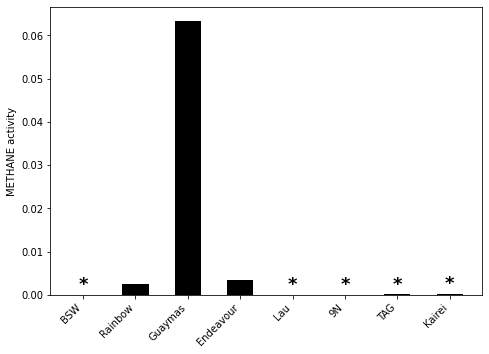

In [3]:
speciation.barplot('METHANE')

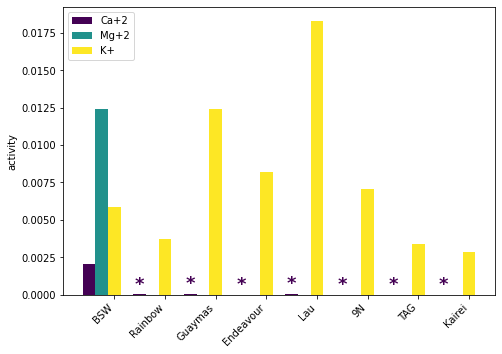

In [4]:
speciation.barplot(["Ca+2", "Mg+2", "K+"])

In [5]:
speciation.lookup(["SiO2", "Mg(HSiO3)+", "Ca(HSiO3)+", "NaHSiO3"])

Sample,Ca(HSiO3)+,Mg(HSiO3)+,NaHSiO3,SiO2
,log_activity,log_activity,log_activity,log_activity
BSW,-7.6118,-6.5192,-4.3167,-3.9598
Rainbow,-9.1682,NaN,-8.3880,-2.1612
Guaymas,-4.7647,NaN,-3.9382,-1.8676
Endeavour,-7.2733,NaN,-5.8542,-1.7696
Lau,-9.3419,NaN,-8.5857,-1.8386
9N,-9.1106,NaN,-8.0336,-1.6990
TAG,-8.7628,NaN,-7.5495,-1.6576
Kairei,-7.1127,NaN,-6.0386,-1.7773


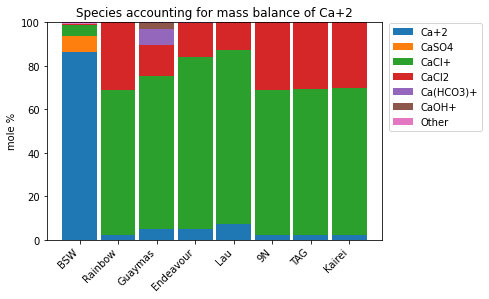

In [6]:
speciation.plot_mass_contribution("Ca+2")

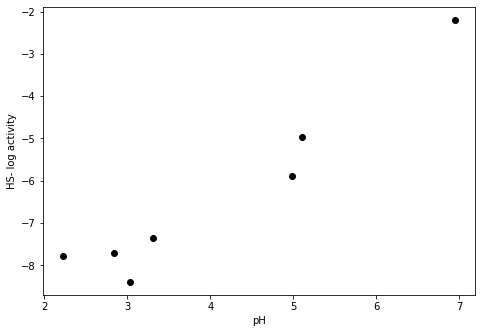

In [7]:
speciation.scatterplot("pH", "HS-")

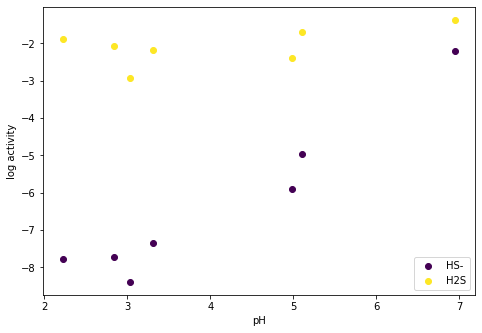

In [8]:
speciation.scatterplot("pH", ["HS-", "H2S"])

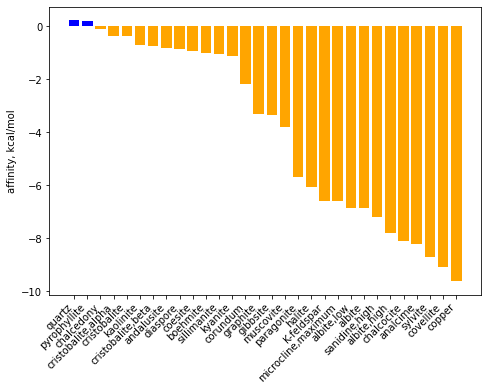

In [9]:
speciation.plot_mineral_saturation('Lau')

---

### Increasing pressure

The default database goes from 0-350°C at saturation pressure:

In [10]:
speciation.lookup(["Temperature", "Pressure", "pH"])

Sample,Temperature,Pressure,pH
,degC,bar,pH
BSW,2.0,1.0462,7.80
Rainbow,350.0,165.2100,3.03
Guaymas,315.0,105.5600,6.95
Endeavour,345.0,155.3900,5.10
Lau,334.0,135.3800,2.22
9N,350.0,165.2100,2.84
TAG,350.0,165.2100,3.31
Kairei,349.0,163.2100,4.98


What if we want to increase the pressure? (Or temperature range?)

The database can be recalibrated to different T-P ranges with `create_data0()`. For instance, 250 bars:

In [11]:
AqEquil().create_data0(
    filename = "wrm_data.csv", # thermodynamic datasheet CSV
    grid_temps=[0.01, 50, 100, 150, 200, 250, 300, 350], # degrees C
    grid_press=[250, 250, 250, 250, 250, 250, 250, 250], # bars
    db = "cst", # three letter name of your recalibrated database
    template_name="sample_template_cst.csv", # creates a blank template for sample data
    )

Creating data0.cst...
Finished creating data0.cst.


Once the database has been recalibrated as 'cst', use it in a speciation calculation:

In [12]:
speciation = AqEquil().speciate(input_filename="S&C10vents.csv",
                                custom_db=True, # use a custom database?
                                db="cst", # name of the custom database
                               )

Successfully created a data1.cst from data0.cst
Using cst to speciate Rainbow
Using cst to speciate BSW
Using cst to speciate Endeavour
Using cst to speciate Guaymas
Using cst to speciate 9N
Using cst to speciate Lau
Using cst to speciate TAG
Using cst to speciate Kairei
Finished!


In [13]:
speciation.lookup(["Temperature", "Pressure", "pH"])

Sample,Temperature,Pressure,pH
,degC,bar,pH
BSW,2.0,250.0,7.80
Rainbow,350.0,250.0,3.03
Guaymas,315.0,250.0,6.95
Endeavour,345.0,250.0,5.10
Lau,334.0,250.0,2.22
9N,350.0,250.0,2.84
TAG,350.0,250.0,3.31
Kairei,349.0,250.0,4.98


---

### Microbial energy supply

<img src="https://www.igpms.ucsb.edu/sites/default/files/styles/medium/public/2019-05/guaymas-microbial-mats.jpg" title="Credit: Professor Andreas Teske, UNC Chapel Hill" width=500/>

*Microbial mats on hydrothermal sediments in the Guaymas Basin*

*Methanopyrus kandleri* has been found in submarine hydrothermal systems, including the Guaymas Basin.

<center>
<img src="https://alchetron.com/cdn/methanopyrus-4b113cae-c869-47bb-8c69-1e113a1b9c8-resize-750.jpeg" title="Methanopyrus kandleri." width=200/>
<\center>

<center><i>Methanopyrus kandleri<\i></center>

These microbes can grow up to 122°C and produce CH$_4$ by reducing CO$_2$ with H$_2$:

\begin{align}
\mathop{\rm{CO_{2}}} + \mathop{\rm{4H_{2}}} & \rightleftharpoons \rm{2H_{2}O} + \rm{CH_{4}} \\
\end{align}

What is the chemical affinity and energy supply in our vent fluid samples?

<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/WORM-tour/affinity.png" title="Affinity calculation" width=800/>

<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/WORM-tour/energy.png" title="Energy supply calculation" width=800/>

In [14]:
speciation = AqEquil().speciate(input_filename="S&C10vents.csv",
                                report_filename="out.csv",
                                custom_db=True,
                                db="cst",
                                get_affinity_energy=True, # calculate energy supplies
                                rxn_filename="H2_oxidation_rxns.txt", # file defining reactions
                               )

Successfully created a data1.cst from data0.cst
Using cst to speciate Rainbow
Using cst to speciate BSW
Using cst to speciate Endeavour
Using cst to speciate Guaymas
Using cst to speciate 9N
Using cst to speciate Lau
Using cst to speciate TAG
Using cst to speciate Kairei
Finished!


Here's that reaction again:

\begin{align}
\mathop{\rm{CO_{2}}} + \mathop{\rm{4H_{2}}} & \rightleftharpoons \rm{2H_{2}O} + \rm{CH_{4}} \\
\end{align}

In [15]:
speciation.lookup(["Temperature", "H2_CO2_affinity", "H2_CO2_energy"])

Sample,Temperature,H2_CO2_affinity,H2_CO2_energy
,degC,cal/mol e-,cal/kg.H2O
BSW,2.0,NaN,NaN
Rainbow,350.0,847.6372,27.124390
Guaymas,315.0,280.7452,1.909067
Endeavour,345.0,-1107.4280,-1.373210
Lau,334.0,-334.3526,-0.334353
9N,350.0,317.8897,1.144403
TAG,350.0,-1290.5540,-0.955010
Kairei,349.0,660.1799,10.813750


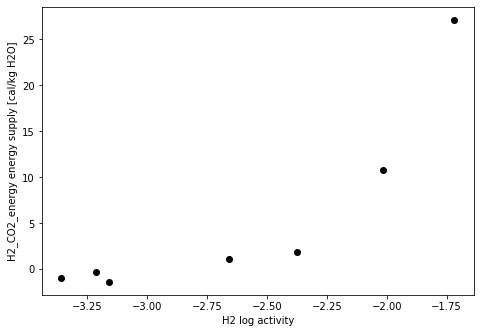

In [16]:
speciation.scatterplot("H2", "H2_CO2_energy")

---
### Basic EQ6 integration

In [17]:
AqEquil().runeq6("crisqtz.6i", "wrm")

Using wrm to speciate crisqtz


---
## Reaction Property Calculations with pyCHNOSZ

<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/WORM-tour/pyCHNOSZ.png" title="AqOrg" width=800/>

### Example:

\begin{align}
\mathop{\rm{K(AlSi_{3})O_{8}}}\limits_{\text{(K-feldspar)}} + \mathop{\rm{Al_{2}Si_{2}O_{5}(OH)_{4}}}\limits_{\text{(kaolinite)}} & \rightleftharpoons \rm{H_{2}O} + \rm{2SiO_{2(aq)}} + \mathop{\rm{KAl_{2}(AlSi_{3})O_{10}(OH)_{2}}}\limits_{\text{(muscovite)}} \\
\end{align}

- What are the standard molal properties of this reaction from 0 to 350°C at saturation pressure?
- At elevated pressure?

First, load up the pyCHNOSZ package:

In [18]:
from pyCHNOSZ import *

Check that these species are in the database with `info()`:

In [19]:
info(info(["K-feldspar", "kaolinite", "SiO2", "muscovite"]))

info.character: found SiO2(aq); other available phases are coesite, cristobalite,alpha, cristobalite,beta, quartz, quartz,beta, tridymite,high, tridymite,low, chalcedony, cristobalite

info.numeric: Cp of K-feldspar(cr) is NA; set by EOS parameters to 44.22 cal K-1 mol-1

info.numeric: Cp of kaolinite(cr) is NA; set by EOS parameters to 57.27 cal K-1 mol-1

info.numeric: Cp of muscovite(cr) is NA; set by EOS parameters to 76.81 cal K-1 mol-1



,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a1.a,a2.b,a3.c,a4.d,c1.e,c2.f,omega.lambda,z.T
2557,K-feldspar,K-Fs,K(AlSi3)O8,cr,HDNB78 [S92],N,5.May.78,cal,-895374.0,-949188.0,...,44.215918,108.87,76.617,0.004311,-2994500.0,0.0,0.0,0.0,0.0,1400.0
2543,kaolinite,Kln,Al2Si2O5(OH)4,cr,HDNB78 [S92],N,5.May.78,cal,-905614.0,-982221.0,...,57.267215,99.52,72.770,0.029200,-2152000.0,0.0,0.0,0.0,0.0,1000.0
67,SiO2,NA,SiO2,aq,SHS89.1 [S92],N,13.Jan.89,cal,-199190.0,-209775.0,...,-76.100000,16.10,0.190,170.000000,20.0,-27000.0,29.1,-512000.0,12910.0,0.0
2553,muscovite,Ms,KAl2(AlSi3)O10(OH)2,cr,HDNB78 [S92],N,5.May.78,cal,-1336301.0,-1427408.0,...,76.806657,140.71,97.560,0.026380,-2544000.0,0.0,0.0,0.0,0.0,1000.0


Calculate reaction properties with `subcrt()`:

In [20]:
subcrt(species=["K-feldspar", "kaolinite", "H2O", "SiO2", "muscovite"],
       coeff=[-1, -1, 1, 2, 1])

info.character: found H2O(liq); other available states are cr, gas

info.character: found SiO2(aq); other available phases are coesite, cristobalite,alpha, cristobalite,beta, quartz, quartz,beta, tridymite,high, tridymite,low, chalcedony, cristobalite

subcrt: 5 species at 15 values of T (ºC) and P (bar) (wet) [energy units: cal]



,coeff,name,formula,state,ispecies
2557,-1,K-feldspar,K(AlSi3)O8,cr,2557.0
2543,-1,kaolinite,Al2Si2O5(OH)4,cr,2543.0
1,1,water,H2O,liq,1.0
67,2,SiO2,SiO2,aq,67.0
2553,1,muscovite,KAl2(AlSi3)O10(OH)2,cr,2553.0


,T,P,rho,logK,G,H,S,V,Cp
1,0.01,1.000000,0.999829,-8.328090,10409.258104,22914.037676,45.779326,-11.155500,-447.204769
2,25.00,1.000000,0.997061,-7.051003,9619.288519,16134.244670,21.852280,-17.485226,-158.903975
3,50.00,1.000000,0.988030,-6.220115,9197.288626,13466.922013,13.213475,-20.439476,-68.715258
4,75.00,1.000000,0.974864,-5.597888,8917.598386,12285.478164,9.674511,-22.119885,-30.581287
5,100.00,1.013220,0.958393,-5.093168,8696.183136,11782.210421,8.271013,-23.196874,-11.707746
6,125.00,2.320144,0.939073,-4.662990,8495.098718,11628.131643,7.869733,-23.966840,-1.599566
7,150.00,4.757169,0.917058,-4.284951,8296.548133,11662.460840,7.955131,-24.602986,3.832525
8,175.00,8.918049,0.892343,-3.945992,8091.646227,11792.875654,8.259580,-25.246353,6.313741
9,200.00,15.536499,0.864743,-3.638153,7876.569060,11954.965566,8.620306,-26.063214,6.421813
10,225.00,25.478603,0.833873,-3.356530,7650.819583,12089.006298,8.909943,-27.319075,3.837636


It is also possible to specify temperature and pressures:

In [21]:
subcrt(species=["K-feldspar", "kaolinite", "H2O", "SiO2", "muscovite"],
       coeff=[-1, -1, 1, 2, 1],
       T=255, P=1100)

info.character: found H2O(liq); other available states are cr, gas

info.character: found SiO2(aq); other available phases are coesite, cristobalite,alpha, cristobalite,beta, quartz, quartz,beta, tridymite,high, tridymite,low, chalcedony, cristobalite

subcrt: 5 species at 255 ºC and 1100 bar (wet) [energy units: cal]



,coeff,name,formula,state,ispecies
2557,-1,K-feldspar,K(AlSi3)O8,cr,2557.0
2543,-1,kaolinite,Al2Si2O5(OH)4,cr,2543.0
1,1,water,H2O,liq,1.0
67,2,SiO2,SiO2,aq,67.0
2553,1,muscovite,KAl2(AlSi3)O10(OH)2,cr,2553.0


,T,P,rho,logK,G,H,S,V,Cp
1,255.0,1100,0.877722,-2.75729,6663.417575,12127.355096,10.345998,-27.272605,11.16644


Create a predominance diagram of minerals in the K$_2$O-Al$_2$O$_3$-SiO$_2$-H$_2$O system:

add.OBIGT: read 3 rows; made 2 replacements, 1 additions [energy units: cal]

affinity: temperature is 25 ºC

affinity: pressure is Psat

affinity: variable 1 is log10(a_H4SiO4) at 600 values from -8 to 0

affinity: variable 2 is log10(a_K+) at 600 values from -1 to 8

subcrt: 11 species at 25 ºC and 1 bar (wet) [energy units: cal]



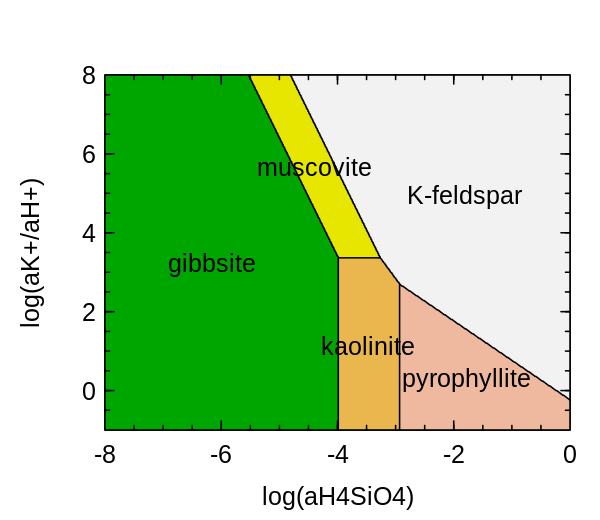

balance: on moles of Al+3 in formation reactions

diagram: using maximum affinity method for 2-D diagram



In [22]:
# make HSiO4 available
add_OBIGT("AS04") 

# define basis and species in a mini-speciation calculation
basis(["Al+3", "H4SiO4", "K+", "H2O", "H+", "O2"])
species(["gibbsite", "muscovite", "kaolinite", "pyrophyllite", "K-feldspar"])

# what basis species should go on the x and y axes? Ranges? Number of calculations?
params = {"H4SiO4":[-8, 0, 600], "K+":[-1, 8, 600]}
a = affinity(**params)

# create the diagram
_ = diagram(a, xlab="log(aH4SiO4)", ylab="log(aK+/aH+)", fill="terrain")

---
## Estimate thermodynamic properties of aqueous organics with AqOrg

<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/WORM-tour/AqOrg_slide.png" title="AqOrg" width=800/>

<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/5-Thermodynamic-Property-Estimation/1-Aq-Organics-Intro-Demo/Figure-1.png" width=800 height=600 style="background-color:white;padding:0px;"/>

First, import the package:

In [23]:
from AqOrg import Estimate

Estimate the properties of the molecule with `Estimate()`

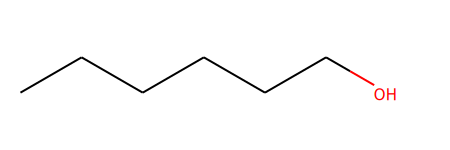

In [24]:
hexanol = Estimate("1-hexanol")

View group matches:

In [25]:
hexanol.group_matches

,[C!H3]-[CX4H3R0],C-[CX4H2R0]-C,O-[CX4H2]-C,C-[OX2H],formula
1-hexanol,1,4,1,1,C6H14O


View estimated properties:

In [26]:
hexanol.OBIGT

,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a1.a,a2.b,a3.c,a4.d,c1.e,c2.f,omega.lambda,z.T
0,1-hexanol,C6H14O,C6H14O,aq,AqOrg,GrpAdd,26/07/2021 15:39:08,J,-147480.0,-387470.0,...,613.200273,117.72,98.783255,70.450358,119.933082,-46.711667,581.936497,12.6553,-0.602091,0


### Example: Archaeal Lipids

Archaeol is a lipid biomarker for Archaea.

<img src="http://www.clovegarden.com/ingred/img/archaea01l.jpg" title="archaeal membrane" width=600/>
<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/WORM-tour/Archaeol_structure.png" title="archaeol" width=600 style="background-color:white;padding:20px;"/>
<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/WORM-tour/Unsaturated_archaeol.png" title="unsaturated archaeol" width=600 style="background-color:white;padding:20px;"/>

Estimate the properties of archaeol with `Estimate()`.

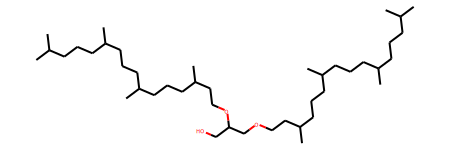

In [27]:
archaeol = Estimate("archaeol", Cph=2633)

In [28]:
archaeol.OBIGT

,name,abbrv,formula,state,ref1,ref2,date,E_units,G,H,...,Cp,V,a1.a,a2.b,a3.c,a4.d,c1.e,c2.f,omega.lambda,z.T
0,archaeol,C43H88O3,C43H88O3,aq,AqOrg,GrpAdd,26/07/2021 15:39:09,J,-70530.0,-1617450.0,...,3664.52079,709.94,599.206356,415.887609,825.540648,-304.983826,3638.546169,10.42243,-0.520494,0


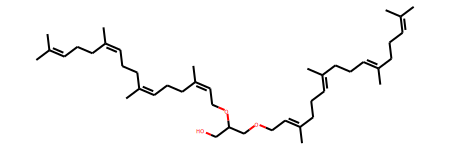

In [29]:
unsaturated_archaeol = Estimate("2,3-Bis[[(2E,6E,10E)-3,7,11,15-tetramethylhexadeca-2,6,10,14-tetraenyl]oxy]-1-propanol", Cph=2593)

Estimated properties can be imported into pyCHNOSZ with `mod_OBIGT()`:

In [30]:
# make archaeol and unsaturated archaeol available to pyCHNOSZ
mod_OBIGT(archaeol.OBIGT)
mod_OBIGT(unsaturated_archaeol.OBIGT)

mod.OBIGT: added archaeol(aq) with energy units of J

mod.OBIGT: added 2,3-Bis[[(2E,6E,10E)-3,7,11,15-tetramethylhexadeca-2,6,10,14-tetraenyl]oxy]-1-propanol(aq) with energy units of J



[3497]

Now that these lipids are loaded into pyCHNOSZ, we can create an activity diagram:

affinity: pressure is Psat

affinity: variable 1 is log10(a_H2) at 600 values from -30 to 0

affinity: variable 2 is T at 600 values from 273.15 to 623.15 K

subcrt: 5 species at 600 values of T (ºC) and P (bar) (wet) [energy units: cal]



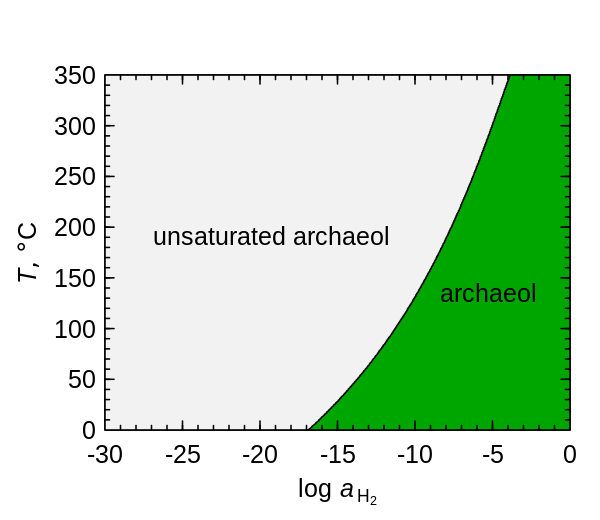

balance: on moles of CO2 in formation reactions

diagram: using maximum affinity method for 2-D diagram



In [31]:
# define basis and species in a mini-speciation calculation
basis(["CO2", "H2", "H2O"])
species(["archaeol", "2,3-Bis[[(2E,6E,10E)-3,7,11,15-tetramethylhexadeca-2,6,10,14-tetraenyl]oxy]-1-propanol"])

# what basis species should go on the x and y axes? Ranges? Number of calculations?
a = affinity(H2=[-30, 0, 600], T=[0, 350, 600])

# create the diagram
_ = diagram(a, names=["archaeol", "unsaturated archaeol"], fill="terrain")

---

<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/WORM-tour/outline.png" title="outline" width=800/>

<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/WORM-tour/wrapup.png" title="wrap up" width=800/>

<img src="https://gitlab.com/worm1/worm-figures/-/raw/master/WORM-tour/thanks.png" title="acknowledgements" width=800/>